# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Mochammad Gani Alfa Alkhoiri Siregar
- **Email:** mochammadganialfa@mhs.unimed.ac.id
- **ID Dicoding:** mgas23

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan kondisi cuaca (weathersit) ?
- Apakah terdapat perbedaan dalam jumlah pengguna sepeda antara hari kerja(workingday) dan hari libur (holiday) ?

## Import Semua Packages/Library yang Digunakan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
# Mengimport libary yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Proses ini membuat dua data frame. "**day_df**" akan meload data dari "**day.csv**" dan "**hour_df**" akan meload data dari "**hour.csv**"

In [235]:
day_df = pd.read_csv("day.csv")
day_df.head(5) # Menampilkan 5 data teratas

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [236]:
hour_df = pd.read_csv("hour.csv")
hour_df.head(5) # Menampilkan 5 data teratas

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

1. <h4><b>Assess pada day_df</b></h4>  

In [237]:
# Mengecek struktur dataframe dari day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Hasil pengecekan Struktur data, didapatkan kesahalan tipe data pada column "dteday". Seharusnya column "dteday" bertipe **datetime**

In [238]:
# Mengecek missing values dari day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Hasil pengecekan tidak terdapat missing values

In [239]:
# Mengecek Duplicate Data
print("Jumlah duplikasi : ", day_df.duplicated().sum())

Jumlah duplikasi :  0


Hasil pengecekan tidak terdapat duplikasi data

2.   <h4><b>Assess pada hour_df</b></h4>



In [240]:
# Mengecek struktur dataframe dari hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Juga didapatkan kesahalan tipe data pada column "dteday". Seharusnya column "dteday" bertipe **datetime**

In [241]:
# Mengecek missing values dari hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Juga tidak terdapat missing values

In [242]:
# Mengecek Duplicate Data
print("Jumlah duplikasi : ", hour_df.duplicated().sum())

Jumlah duplikasi :  0


Juga tidak terdapat duplikasi data

### Cleaning Data

1. <h4><b>Menghapus dataframe yang tidak digunakan</b></h4>

Kedua pertanyaan bisnis dapat dijawab dengan data "day.csv" karena dataset ini menyediakan informasi harian lengkap tentang penggunaan sepeda serta atribut-atribut seperti kondisi cuaca, hari kerja, dan hari libur. Dengan memanfaatkan kolom-kolom ini, kita dapat menganalisis pola penggunaan sepeda berdasarkan kondisi cuaca serta membandingkan jumlah pengguna sepeda antara hari kerja dan hari libur untuk melihat adanya perbedaan. Oleh karena itu, tidak diperlukan data "hour.csv" yang memberikan informasi per jam.

In [243]:
# Menghapus dataframe hour_df
del hour_df

2. <h4><b>Mengubah tipe data pada "dteday"</b></h4>

In [244]:
# data yang awalnya object akan dikonversi ke tipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [245]:
# Menampilkan struktur data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

pada column dteday data sudah terkonversi menjadi "**datetime64**"

3. <h4><b>Merubah nama musim untuk memudahkan visualisasi</b></h4>

- Musim Clear: Jika weathersit sama dengan 1.
- Musim Cloudy: Jika weathersit sama dengan 2.
- Musim Rain: Jika weathersit sama dengan 3.

In [246]:
# Mengganti nilai weathersit menjadi nama musim
day_df['weathersit'] = day_df['weathersit'].replace({1: 'Clear', 2: 'Cloudy', 3: 'Rain'})

# Menampilkan hasil perubahan
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Working-days: Jika workingday sama dengan 0.
- Holiday: Jika workingday sama dengan 1.

In [247]:
# Mengganti nilai workingday menjadi working-days atau holiday
day_df['workingday'] = day_df['workingday'].replace({0: 'working-days', 1: 'holiday'})

# Menampilkan hasil perubahan
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,working-days,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,working-days,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,holiday,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,holiday,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,holiday,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### 1. Analisis Distribusi Variabel Target

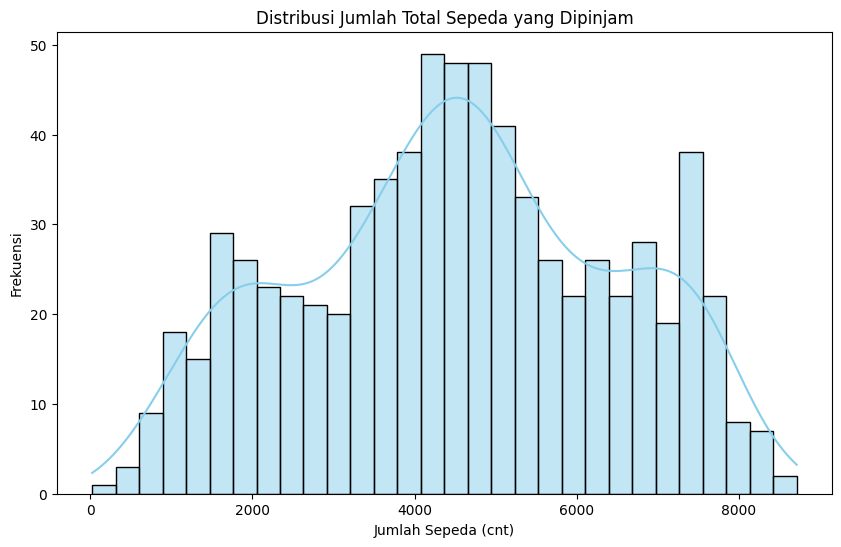

In [248]:
# Melihat distribusi variabel target 'cnt' (jumlah total sepeda yang dipinjam)
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Jumlah Total Sepeda yang Dipinjam')
plt.xlabel('Jumlah Sepeda (cnt)')
plt.ylabel('Frekuensi')
plt.show()

In [249]:
# Melihat statistik deskriptif variabel target 'cnt'
print(day_df['cnt'].describe())

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64


In [250]:
# Mendapatkan meadn dan median dari variabel target 'cnt'
median_cnt = day_df['cnt'].median()
print("Median:", median_cnt)
mean_cnt = day_df['cnt'].mean()
print("Mean cnt:", mean_cnt)

Median: 4548.0
Mean cnt: 4504.3488372093025


Berdasarkan histogram dan nilai mean dan median, data terdistribusi secara Left-skew karena nilai median lebih besar dibanding nilai mean

### 2. Hubungan antar Variabel Numerik

<ipython-input-251-3e8b0bad5683>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = day_df.corr()


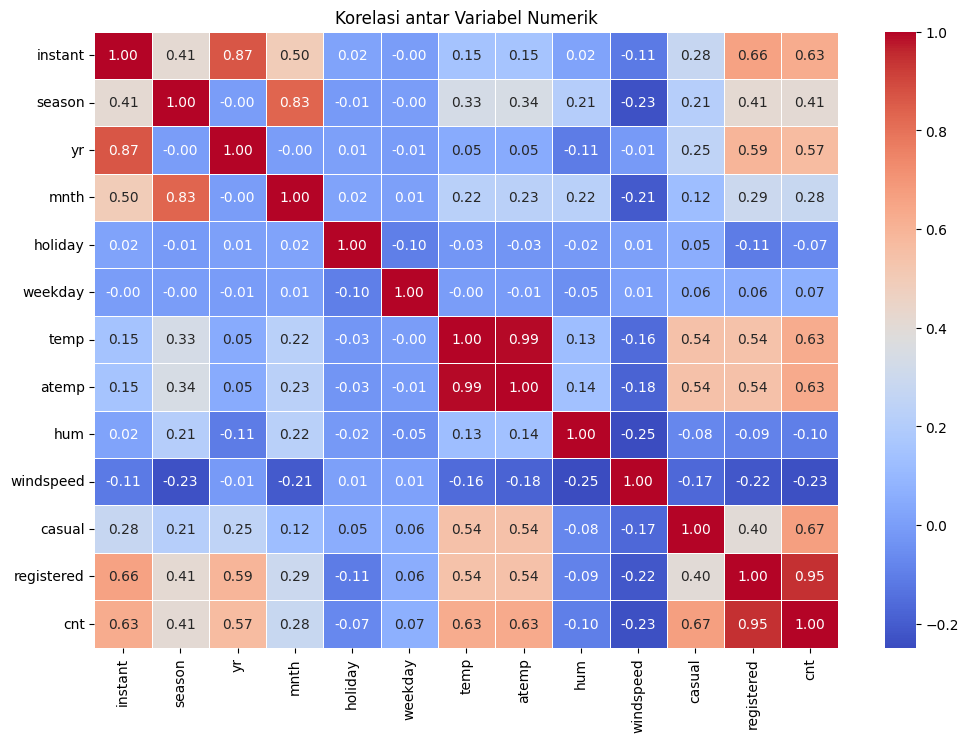

In [251]:
# Korelasi antara variabel numerik
correlation_matrix = day_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi antar Variabel Numerik')
plt.show()

Dengan menganalisis heatmap korelasi, didapatkan:

- emp dan atemp: Korelasi 0.99 menunjukkan hubungan yang sangat kuat.
- cnt dan casual: Korelasi 0.67 menunjukkan hubungan yang kuat.
- cnt dan registered: Korelasi 0.95 menunjukkan hubungan yang sangat kuat.

### 3. Analisis Variabel Kategori

<ipython-input-252-3aabe24d152a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='Set2')


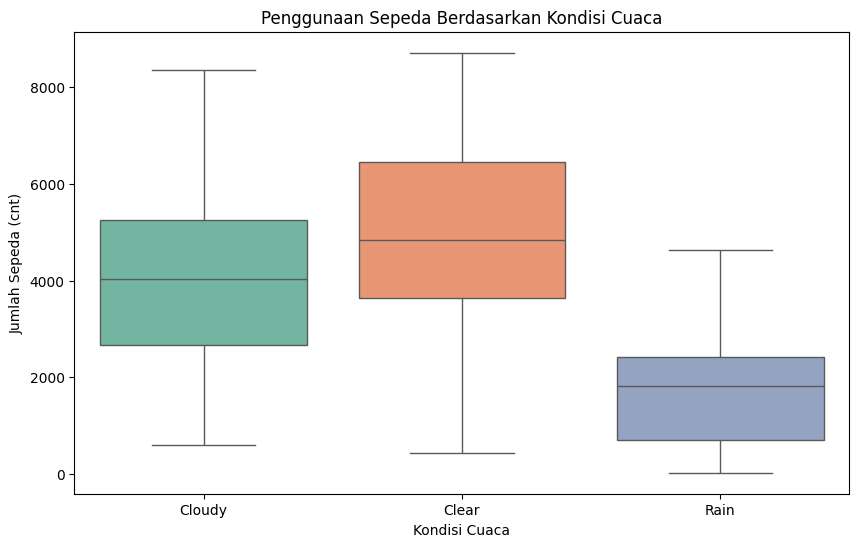

In [252]:
# Penggunaan sepeda berdasarkan kondisi cuaca (weathersit)
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='Set2')
plt.title('Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Sepeda (cnt)')
plt.show()

<ipython-input-253-a0cb71b98a68>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workingday', y='cnt', data=day_df, palette='Set1')


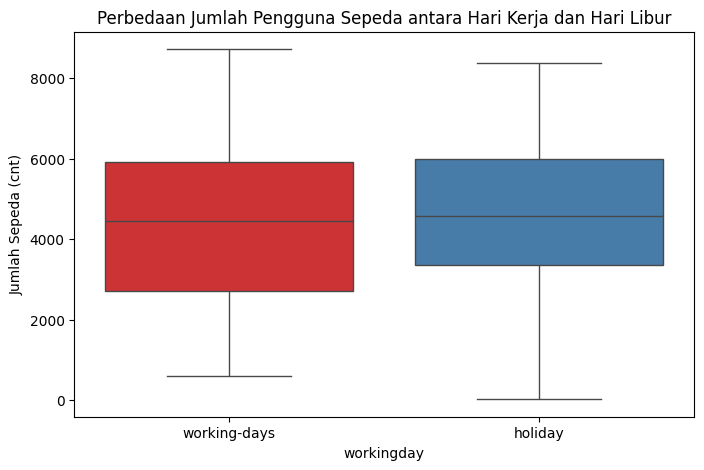

In [253]:
# Perbedaan jumlah pengguna sepeda antara hari kerja dan hari libur
plt.figure(figsize=(8, 5))
sns.boxplot(x='workingday', y='cnt', data=day_df, palette='Set1')
plt.title('Perbedaan Jumlah Pengguna Sepeda antara Hari Kerja dan Hari Libur')
plt.ylabel('Jumlah Sepeda (cnt)')
plt.show()

### 4. Analisis Trend Data Waktu

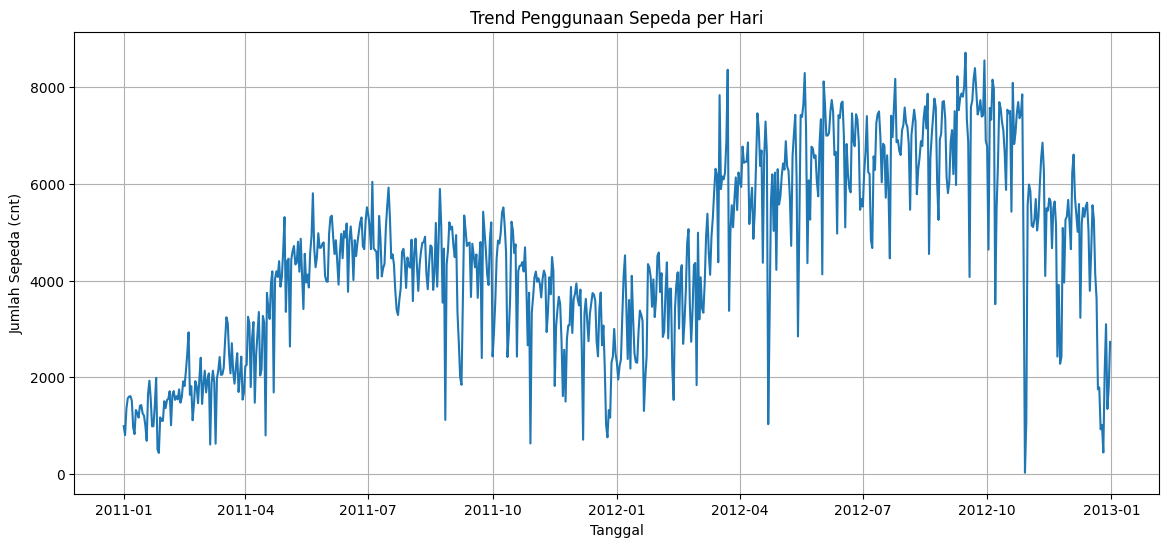

In [254]:
# Mengubah kolom 'dteday' menjadi index untuk mempermudah visualisasi
day_df.set_index('dteday', inplace=True)

# Visualisasi trend penggunaan sepeda per hari
plt.figure(figsize=(14, 6))
plt.plot(day_df.index, day_df['cnt'], color='tab:blue')
plt.title('Trend Penggunaan Sepeda per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sepeda (cnt)')
plt.grid(True)
plt.show()

Dari line chart tersebut didapatkan:
- Penggunaan sepeda mengalami tren menurun dari tahun 2011 hingga 2013.
- Penurunan paling signifikan terjadi pada tahun 2012. Garis turun dengan curam pada tahun ini.
- Ada beberapa fluktuasi dalam penggunaan sepeda selama periode ini. Terlihat dari garis yang naik dan turun di beberapa periode.
- Penggunaan sepeda pada 2013 lebih rendah daripada awal tahun 2011. Hal ini menunjukkan bahwa tren penurunan penggunaan sepeda belum berhenti.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan kondisi cuaca (weathersit) ?

<ipython-input-255-29cb48d6adef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='Set2')


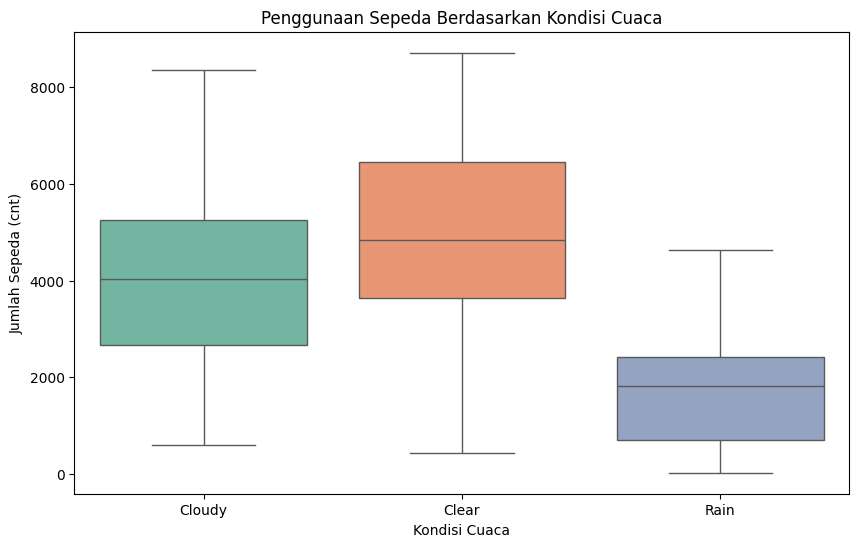

In [255]:
# Analisis pola penggunaan sepeda berdasarkan kondisi cuaca (weathersit)
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='Set2')
plt.title('Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Sepeda (cnt)')
plt.show()

Dari boxplot tersebut didapatkan:
- Secara keseluruhan, lebih banyak sepeda digunakan pada hari clear dibandingkan hari cloudy dan rain. Median (garis tengah kotak) untuk hari cerah lebih tinggi daripada median untuk hari cloudy dan rain
- Sebaran data pada kondisi cuaca "clear" lebih luas atau lebih bervariasi dibandingkan dengan kondisi "cloudy" dan "rain". Hal ini bisa mengindikasikan bahwa pada kondisi cuaca "clear", penggunaan sepeda memiliki variasi yang lebih besar dari pada kondisi cuaca "cloudy" dan "rain".


### Pertanyaan 2: Apakah terdapat perbedaan dalam jumlah pengguna sepeda antara hari kerja(workingday) dan hari libur (holiday) ?

<ipython-input-256-62cfb84d2b51>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workingday', y='cnt', data=day_df, palette='Set1')


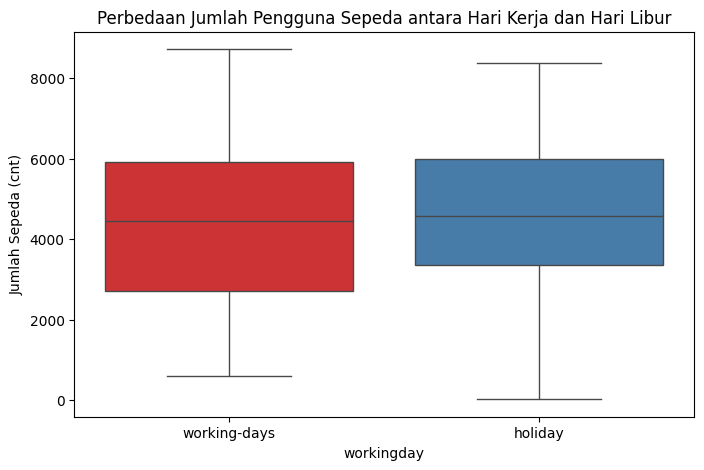

In [256]:
# Analisis perbedaan jumlah pengguna sepeda antara hari kerja dan hari libur
plt.figure(figsize=(8, 5))
sns.boxplot(x='workingday', y='cnt', data=day_df, palette='Set1')
plt.title('Perbedaan Jumlah Pengguna Sepeda antara Hari Kerja dan Hari Libur')
plt.ylabel('Jumlah Sepeda (cnt)')
plt.show()

Dari boxplot tersebut didapatkan:
- Secara keseluruhan, lebih banyak sepeda digunakan pada holiday dibandingkan working-days. Median (garis tengah kotak) untuk holiday lebih tinggi daripada median untuk hari working-days
- Sebaran data pada working-days lebih luas atau lebih bervariasi dibandingkan dengan kondisi holiday. Hal ini bisa mengindikasikan bahwa pada kondisi hari kerja, penggunaan sepeda memiliki variasi yang lebih besar dari pada kondisi hari libur.


## Conclusion

- **Conclution pertanyaan 1**

Berdasarkan analisis, dapat disimpulkan bahwa pola penggunaan sepeda berdasarkan kondisi cuaca (weathersit) menunjukkan bahwa secara keseluruhan, lebih banyak sepeda digunakan pada hari clear dibandingkan hari cloudy dan rain. Median untuk hari cerah lebih tinggi daripada median untuk hari cloudy dan rain, serta sebaran data pada kondisi cuaca "clear" lebih luas atau lebih bervariasi dibandingkan dengan kondisi "cloudy" dan "rain". Hal ini mengindikasikan bahwa pada kondisi cuaca "clear", penggunaan sepeda memiliki variasi yang lebih besar dari pada kondisi cuaca "cloudy" dan "rain".

- **Conclution pertanyaan 2**

Berdasarkan analisis, terdapat perbedaan jumlah pengguna sepeda antara hari kerja dan hari libur. Secara keseluruhan, lebih banyak sepeda digunakan pada hari libur dibandingkan hari kerja. Median untuk hari libur lebih tinggi daripada median untuk hari kerja, serta sebaran data pada hari kerja lebih luas atau lebih bervariasi dibandingkan dengan kondisi hari libur. Hal ini mengindikasikan bahwa pada kondisi hari kerja, penggunaan sepeda memiliki variasi yang lebih besar dari pada kondisi hari libur.